In [3]:
!pip install pandas

import pandas as pd

file_path = r"C:\Users\sbmoon\Desktop\Untitled Folder\dataset_insurance.xlsx"

df = pd.read_excel(file_path)

print(df.head())

   Company Status                                          Advantage
0  삼성생명보험㈜      전         일하는 만큼 돈 벌기가 좋아요. 단기로 짧게 일하고 1500만원까지 벌었어요
1  삼성생명보험㈜      전               큰회사 지역전문가제도 처럼 허울뿐이어도 실존하는 좋은 제도가 존재
2  삼성생명보험㈜      현  ㅇ직무가 세분화되어있어서 특정 분야에서 많이 알수있음 ㅇ생보중에서는 좋은편 (연봉,...
3  삼성생명보험㈜      전                   시간의 자유가 있고 새로운 분야에 대한 교육을 받을수있다.
4  삼성생명보험㈜      현                    회사위치가 강남역과 붙어있어서 위치 편의가 굉장히 좋다.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install pandas scikit-learn nltk matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sbmoon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbmoon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
file_path = r"C:\Users\sbmoon\Desktop\Untitled Folder\dataset_insurance.xlsx"
df = pd.read_excel(file_path)

# Check the dataset
print(df.head())

   Company Status                                          Advantage
0  삼성생명보험㈜      전         일하는 만큼 돈 벌기가 좋아요. 단기로 짧게 일하고 1500만원까지 벌었어요
1  삼성생명보험㈜      전               큰회사 지역전문가제도 처럼 허울뿐이어도 실존하는 좋은 제도가 존재
2  삼성생명보험㈜      현  ㅇ직무가 세분화되어있어서 특정 분야에서 많이 알수있음 ㅇ생보중에서는 좋은편 (연봉,...
3  삼성생명보험㈜      전                   시간의 자유가 있고 새로운 분야에 대한 교육을 받을수있다.
4  삼성생명보험㈜      현                    회사위치가 강남역과 붙어있어서 위치 편의가 굉장히 좋다.


In [11]:
# Example Korean stopwords list (expand as needed)
korean_stopwords = set(["이", "그", "저", "은", "는", "이", "가", "을", "를", "의", "에", "와", "과", "도", "으로", "에서"])

# Update the preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in korean_stopwords]
    # Join tokens back into a string
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_advantage'] = df['Advantage'].apply(preprocess_text)

# Check processed data
print(df[['Company', 'cleaned_advantage']].head())


   Company                                  cleaned_advantage
0  삼성생명보험㈜        일하는 만큼 돈 벌기가 좋아요 . 단기로 짧게 일하고 1500만원까지 벌었어요
1  삼성생명보험㈜               큰회사 지역전문가제도 처럼 허울뿐이어도 실존하는 좋은 제도가 존재
2  삼성생명보험㈜  ㅇ직무가 세분화되어있어서 특정 분야에서 많이 알수있음 ㅇ생보중에서는 좋은편 ( 연봉...
3  삼성생명보험㈜                  시간의 자유가 있고 새로운 분야에 대한 교육을 받을수있다 .
4  삼성생명보험㈜                   회사위치가 강남역과 붙어있어서 위치 편의가 굉장히 좋다 .


In [15]:
# Group reviews by company
company_reviews = df.groupby('Company')['cleaned_advantage'].apply(lambda x: " ".join(x)).reset_index()

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(company_reviews['cleaned_advantage'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (10, 500)


In [17]:
# LDA for topic modeling
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics
lda.fit(tfidf_matrix)

# Display topics
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[-10:]]))

Topic 0:
좋다, 있음, 높은, 좋음, 많이, 급여, 좋아요, 회사, 복지, 연봉
Topic 1:
때문에, 분위기, 광화문역, 시스템이, 여성, 대외적인, 있음, 없다, 있습니다, 좋고
Topic 2:
워라밸이, 복지가, 안정적이고, 있다, 있음, 점점, 사람들이, 있는, 좋은, 좋음


In [19]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters
kmeans.fit(tfidf_matrix)

# Assign clusters to companies
company_reviews['cluster'] = kmeans.labels_

# Display results
print(company_reviews[['Company', 'cluster']])

       Company  cluster
0      DB손해보험㈜        1
1      교보생명보험㈜        1
2     라이나생명보험㈜        0
3   메리츠화재해상보험㈜        2
4      삼성생명보험㈜        0
5    삼성화재해상보험㈜        0
6      서울보증보험㈜        0
7  케이비라이프생명보험㈜        1
8      한화생명보험㈜        0
9    현대해상화재보험㈜        0


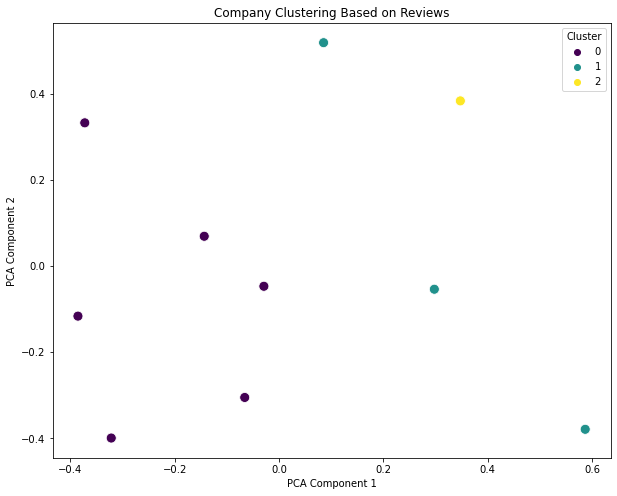

In [20]:
# Reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_matrix[:, 0],
    y=reduced_matrix[:, 1],
    hue=company_reviews['cluster'],
    palette="viridis",
    s=100
)
plt.title("Company Clustering Based on Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()